In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


In [2]:
df=pd.read_csv("data.xlsx - Sheet1.csv")

In [3]:
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [5]:
df_columns=df.columns.str.strip()
df_columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [7]:
df['DOJ'] = pd.to_datetime(df['DOJ'])

C:\Users\user\AppData\Local\Temp\ipykernel_11428\1267054188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOJ'] = pd.to_datetime(df['DOJ'])


In [8]:
df['DOB'] = pd.to_datetime(df['DOB'])

C:\Users\user\AppData\Local\Temp\ipykernel_11428\1662918849.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DOB'] = pd.to_datetime(df['DOB'])


In [9]:
df.describe()

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


In [10]:
df.shape

(3998, 39)

In [11]:
df.drop(columns=['Unnamed: 0', ], inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   float64       
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [13]:
df.isna().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [14]:
df.duplicated().sum()

0

In [15]:
pd.DataFrame(df['Salary']).describe()

,Salary
count,3.998000e+03
mean,3.076998e+05
std,2.127375e+05
min,3.500000e+04
25%,1.800000e+05
50%,3.000000e+05
75%,3.700000e+05
max,4.000000e+06


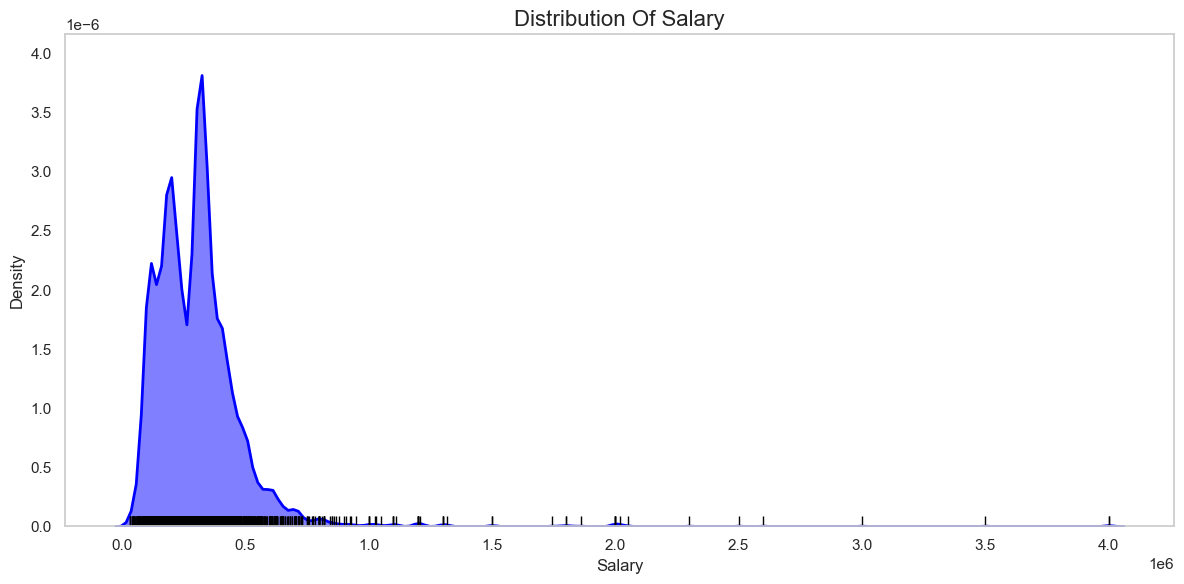

In [47]:
# Set the style for better aesthetics
sns.set(style='whitegrid')

# Create the KDE plot
plt.figure(figsize=(12, 6))  # Set a larger figure size for better visibility
sns.kdeplot(data=df['Salary'], color='blue', linewidth=2, fill=True, alpha=0.5, bw_adjust=0.5)  # Shade the area under the curve

# Add a rug plot using Seaborn
sns.rugplot(df['Salary'], color='black', height=0.02)  # Add a rug plot

# Add title and labels
plt.title("Distribution Of Salary", fontsize=16)
plt.xlabel("Salary", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Add grid
plt.grid()

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()



**average cga of college students***



**OBSERVATIONS**
The salary distribution is right-skewed, indicating that the majority of individuals earn lower salaries, while a smaller proportion earn significantly higher salaries. This suggests that while many employees are clustered around the lower salary range, there are a few high earners pulling the average up.

In [17]:
df['collegeGPA'].mean()

71.48617058529265

In [18]:
df['JobCity'].value_counts()

JobCity
Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: count, Length: 339, dtype: int64

In [19]:
dff=pd.DataFrame(df['Specialization'].value_counts().head(15))
dff

,count
Specialization,
electronics and communication engineering,880
computer science & engineering,744
information technology,660
computer engineering,600
computer application,244
mechanical engineering,201
electronics and electrical engineering,196
electronics & telecommunications,121
electrical engineering,82


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


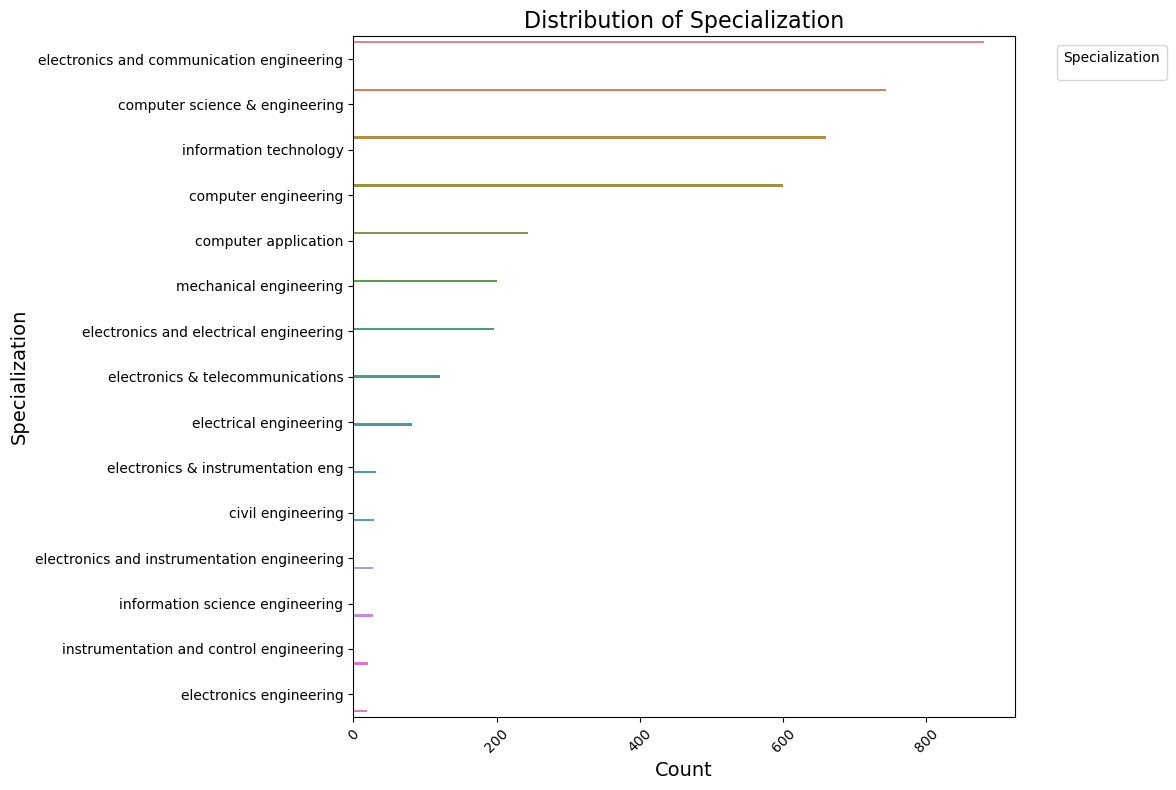

In [20]:


# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot
sns.barplot(y=dff.index, x=dff["count"], hue=dff.index, dodge=True)

# Set the title
plt.title("Distribution of Specialization", fontsize=16)

# Set x-axis and y-axis labels
plt.xlabel("Count", fontsize=14)
plt.ylabel("Specialization", fontsize=14)

# Adjust the legend
plt.legend(title="Specialization", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Rotate y-axis labels for better readability if needed
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


**OBSERVATIONS**
Certain specializations have significantly higher counts than others, indicating varying levels of interest and enrollment.

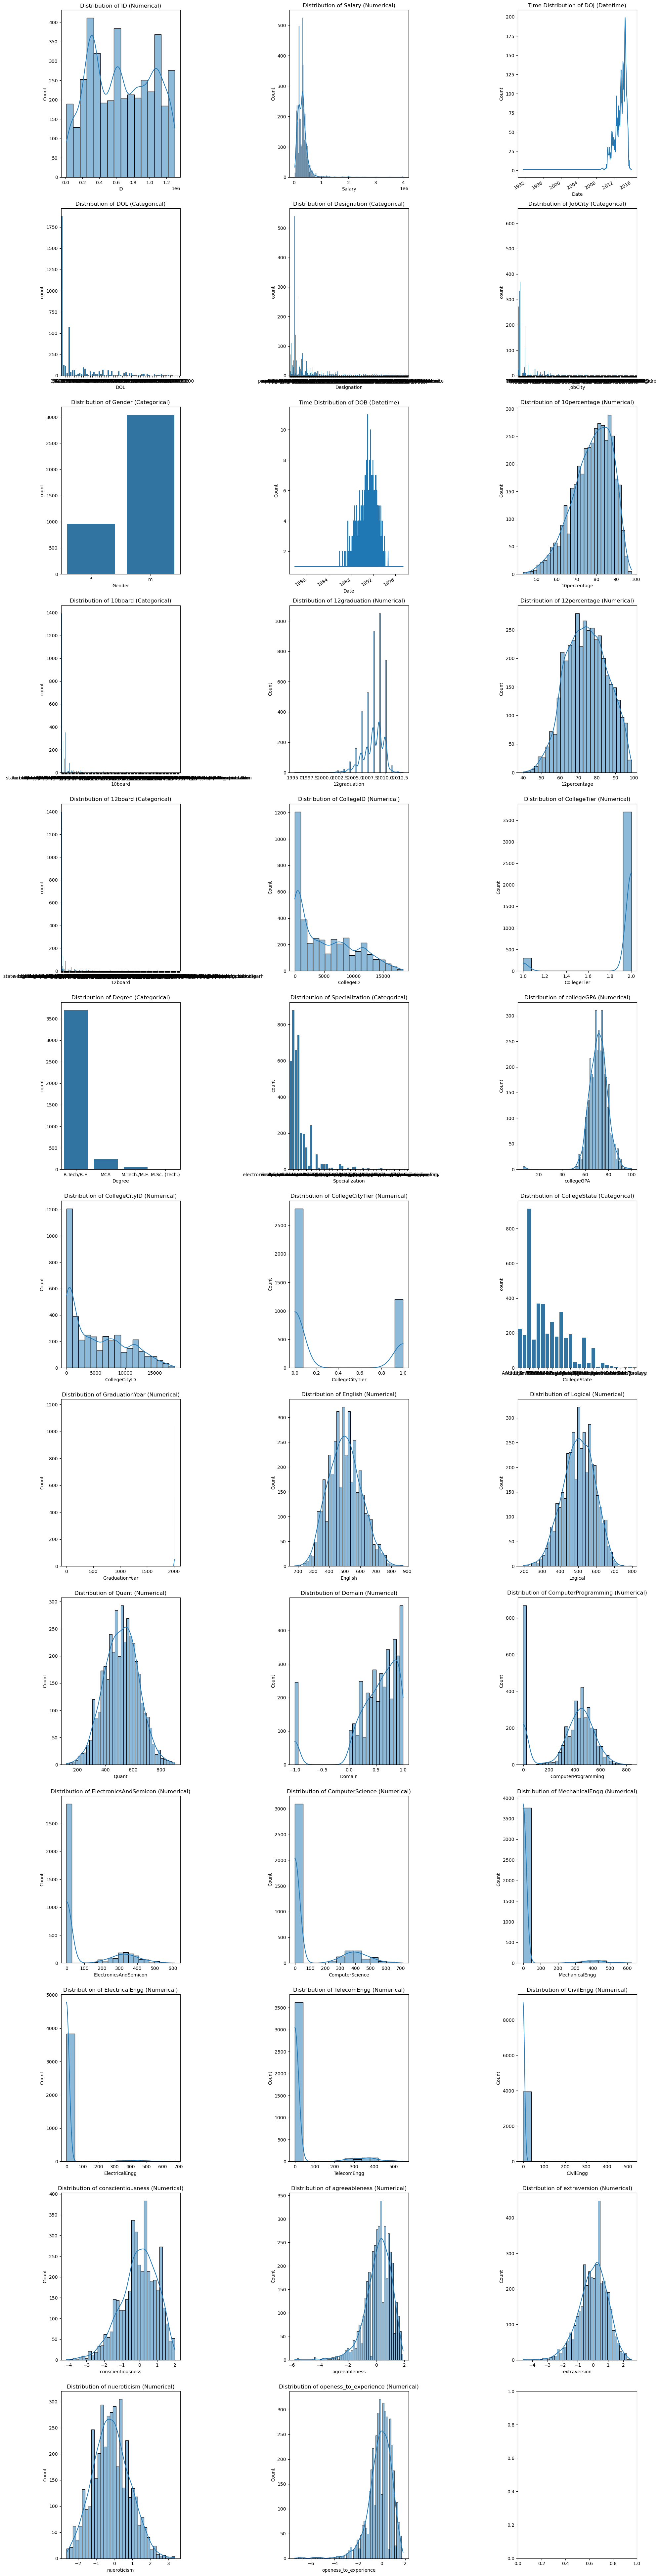

In [21]:
n_cols = len(df.columns)

# Calculate number of rows needed for the subplots
n_rows = int(np.ceil(n_cols / 3))  # 3 columns per row for better layout

# Create subplots
fig, axes = plt.subplots(n_rows, 3, figsize=(20, n_rows * 6))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Iterate over each column in the DataFrame and each subplot axis
for i, col in enumerate(df.columns):
    
    # Check if the column is categorical
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        # Categorical column - use countplot
        sns.countplot(x=col, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} (Categorical)')
    
    # Check if the column is datetime
    elif pd.api.types.is_datetime64_any_dtype(df[col]):
        # Datetime column - plot time distribution
        df[col] = pd.to_datetime(df[col])
        df[col].value_counts().sort_index().plot(ax=axes[i])
        axes[i].set_title(f'Time Distribution of {col} (Datetime)')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel('Count')
    
    # Check if the column is numerical
    elif pd.api.types.is_numeric_dtype(df[col]):
        # Numerical column - use histplot
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} (Numerical)')
    
    # Hide unused axes if fewer columns than subplots
    if i >= n_cols:
        axes[i].axis('off')

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()

**OBSERVATIONS**
Each categorical variable is represented by a countplot, showcasing the number of occurrences for each category. This helps identify which categories are most and least common, indicating areas of potential imbalance or focus within the data.


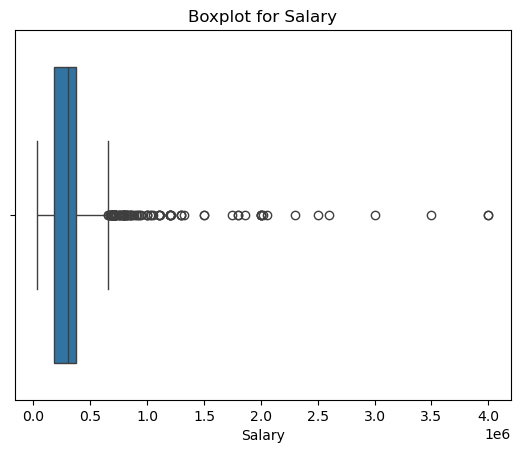

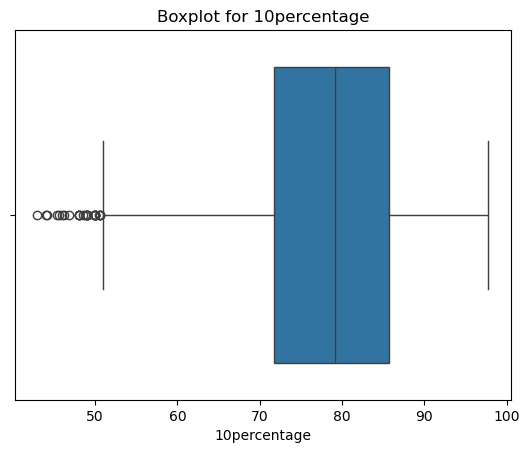

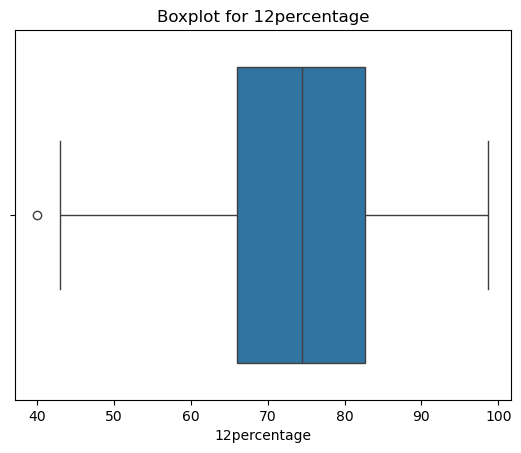

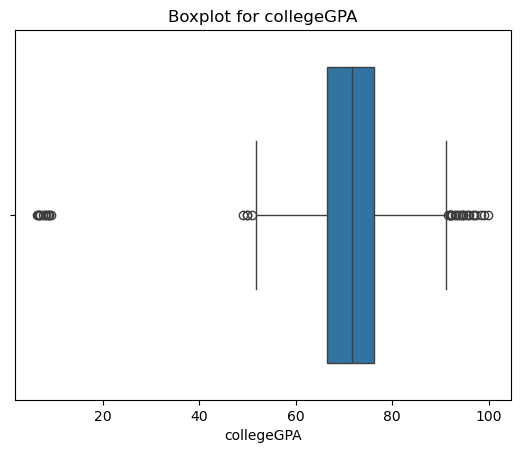

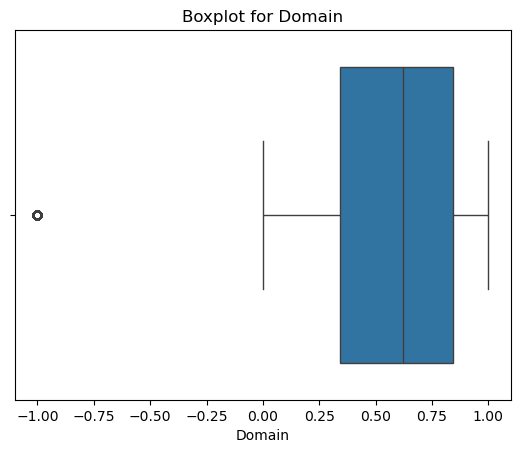

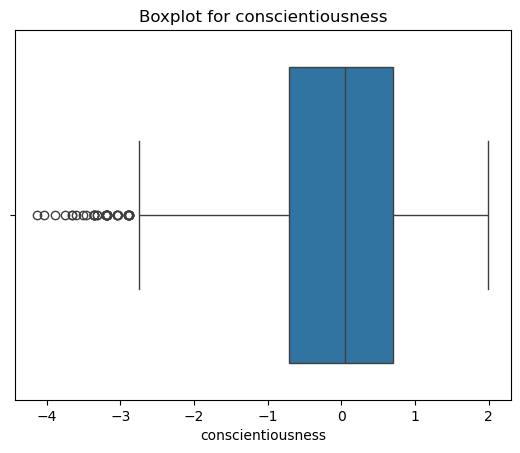

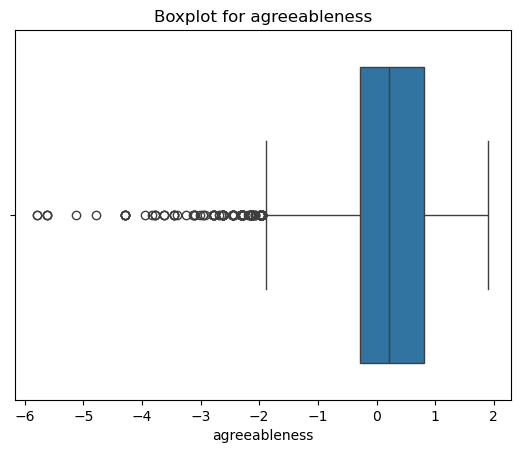

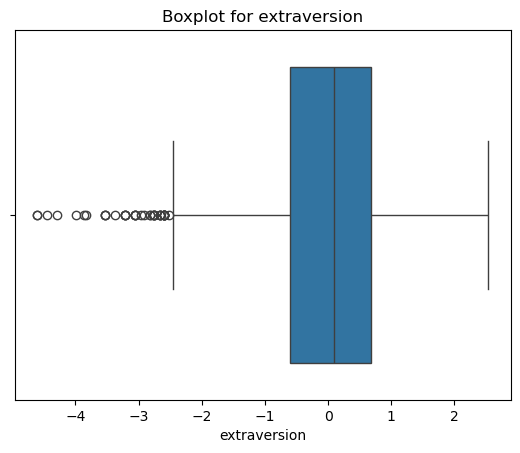

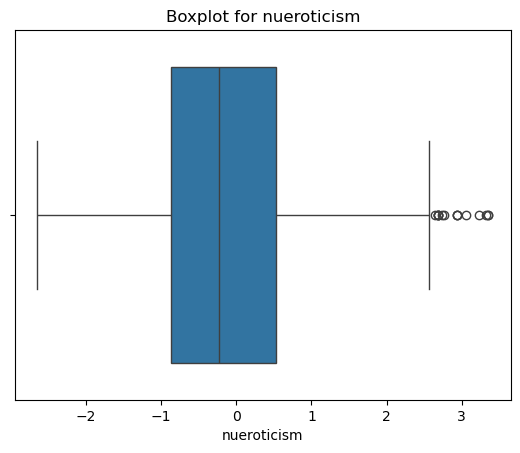

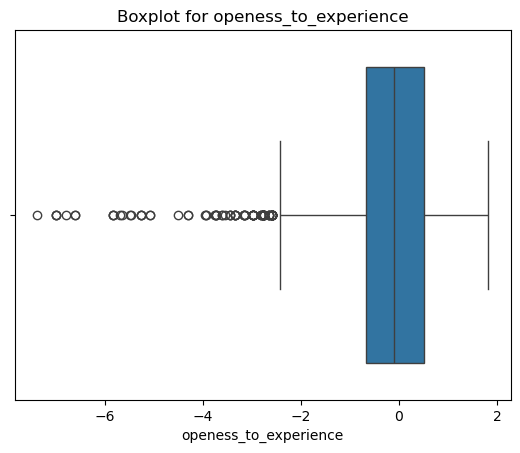

In [22]:
for i in df.columns:
     if df[i].dtype=="int"or df[i].dtype=="float":
         sns.boxplot(x=df[i])
         plt.title("Boxplot for {}".format(i))
         plt.show()

**OBSERVATION**
The boxplots of numerical columns provide insights into the distribution, central tendency, and spread of the data. They effectively identify outliers and indicate skewness or symmetry in the data. Additionally, these plots allow for easy comparison between different numerical variables, highlighting variations in their ranges and quartiles

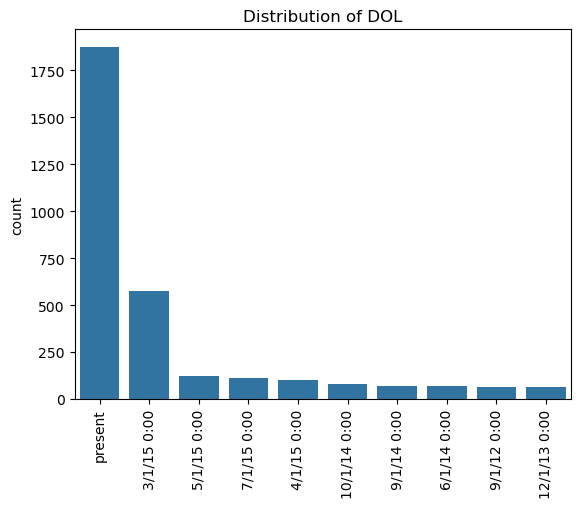

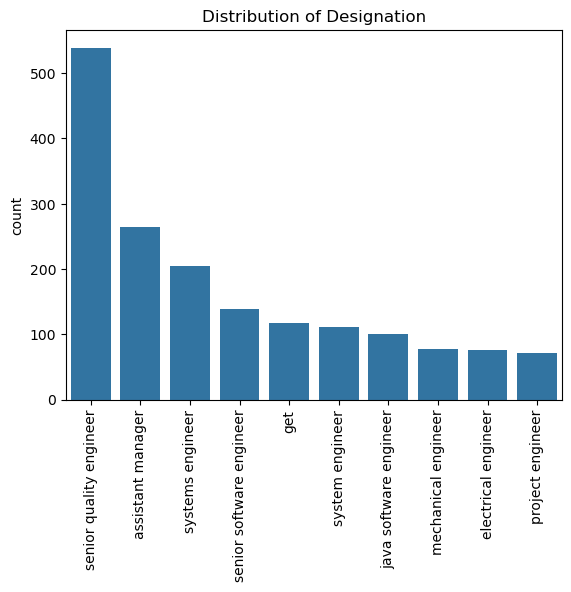

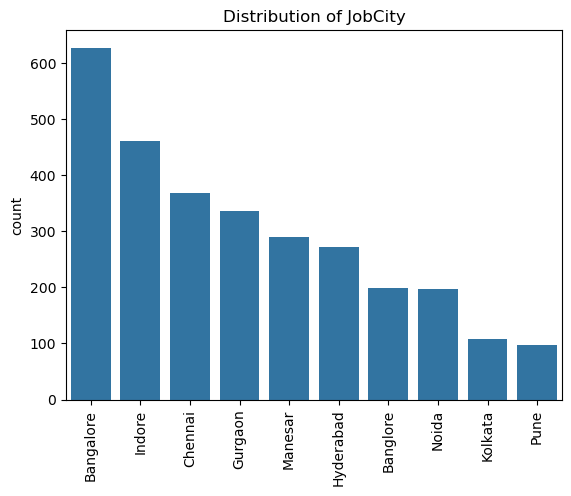

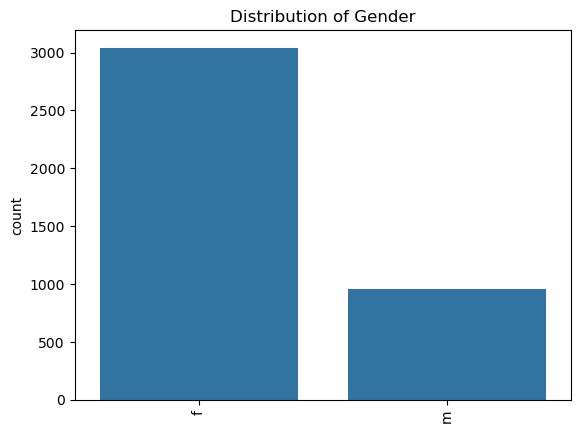

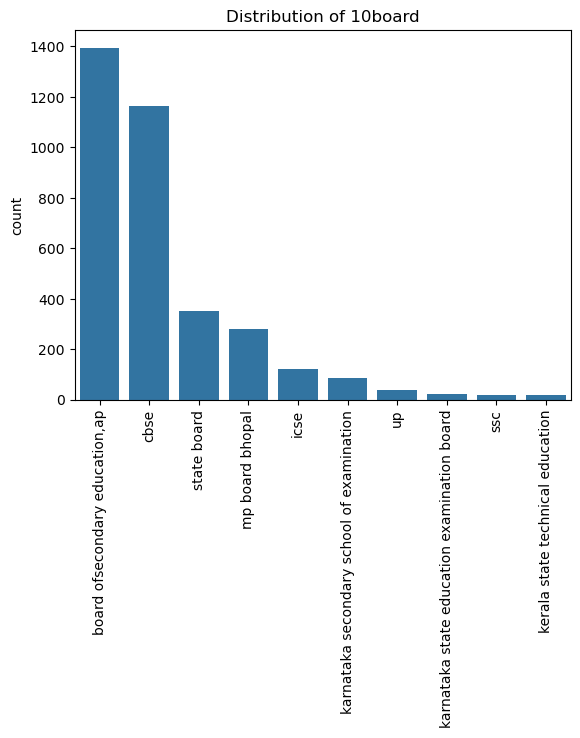

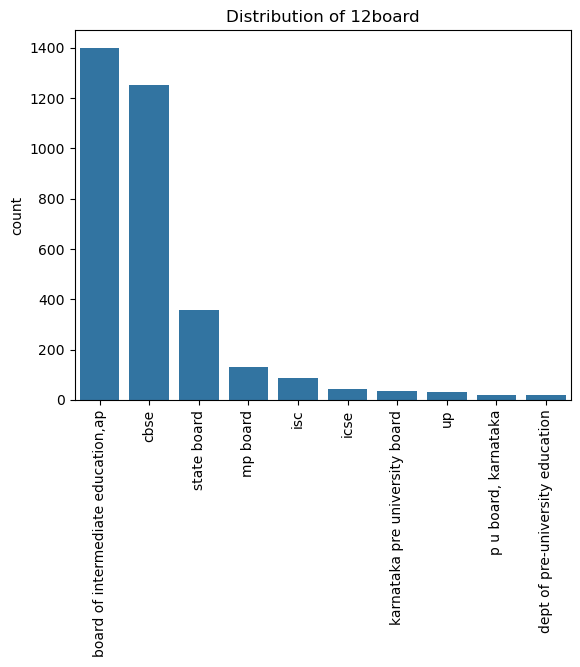

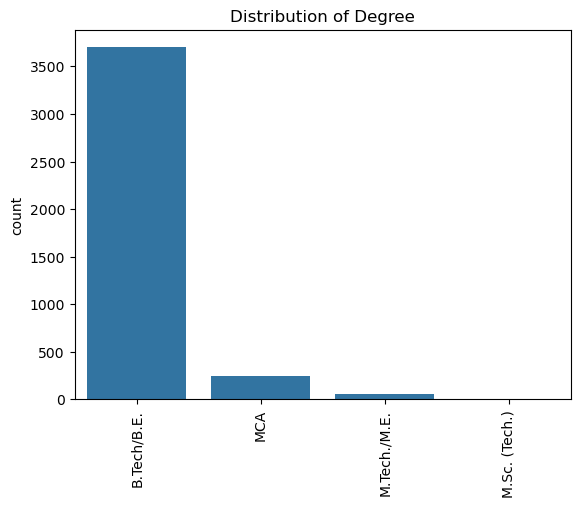

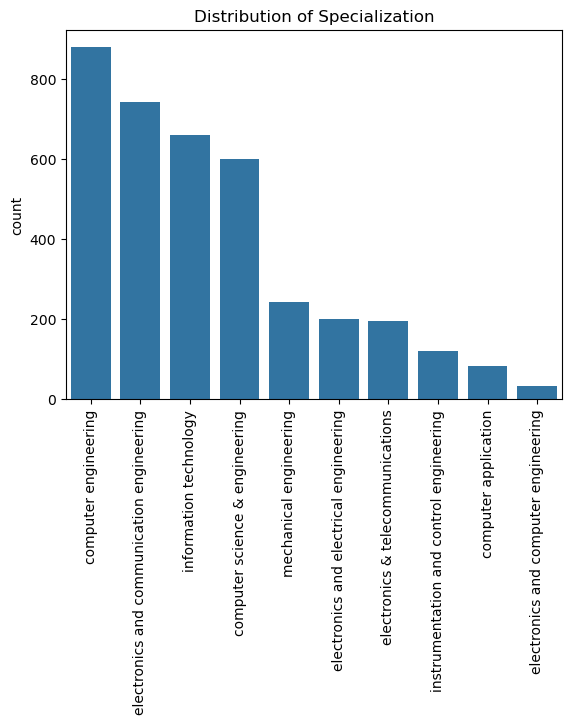

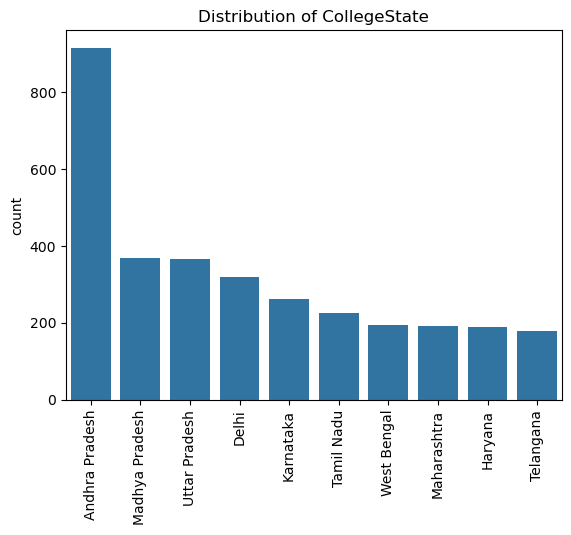

In [23]:
for i in df.columns:
    if df[i].dtype=="object":
        sns.barplot(x=df[i].unique()[:10],y=df[i].value_counts()[:10])        
        plt.title("Distribution of {}".format(i))
        plt.xticks(rotation=90)
        plt.show()
        

**OBSERVATIONS**
The bar plots illustrate the most common categories for each categorical variable, highlighting which categories are predominant in the dataset.

In [24]:
g1 = df.groupby("Specialization")[["collegeGPA"]].mean().sort_values(by="collegeGPA", ascending=False)
g1


,collegeGPA
Specialization,
embedded systems technology,88.000000
control and instrumentation engineering,82.100000
information science,81.200000
internal combustion engine,80.600000
industrial & management engineering,80.000000
computer science,77.385000
computer and communication engineering,77.260000
power systems and automation,76.000000
other,75.619231


C:\Users\user\AppData\Local\Temp\ipykernel_11428\2002581062.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=g1.index[:10], x=g1["collegeGPA"][:10], palette='viridis')  # Use a color palette


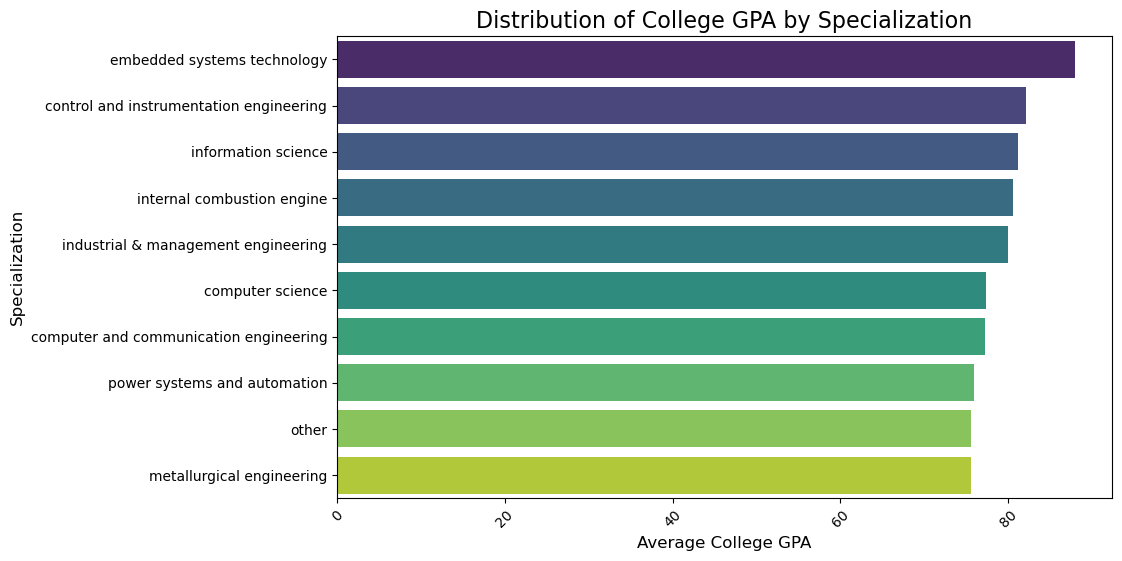

In [40]:
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.barplot(y=g1.index[:10], x=g1["collegeGPA"][:10], palette='viridis')  # Use a color palette
plt.title("Distribution of College GPA by Specialization", fontsize=16)  # Enhanced title
plt.xlabel("Average College GPA", fontsize=12)  # Add x-axis label
plt.ylabel("Specialization", fontsize=12)  # Add y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


**OBSERVATIONS**
The bar plot highlights the top specializations based on College GPA, allowing for easy identification of which specializations have the highest average GPAs.

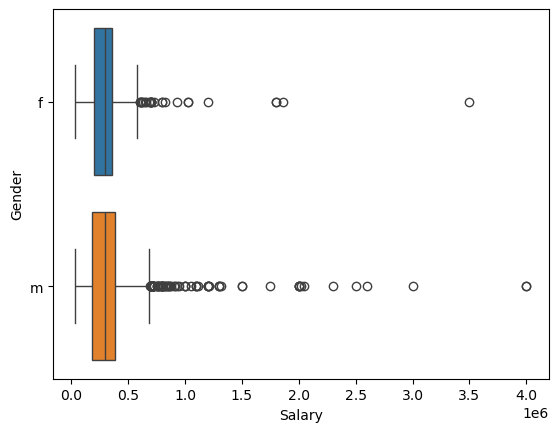

In [26]:
sns.boxplot(y=df["Gender"], x=df["Salary"], hue=df["Gender"])
plt.show()

**OBSERVATION**
The boxplot provides a clear visualization of the salary distribution for each gender, showing the median salary, interquartile range (IQR), and potential outliers.

In [27]:
g2 = pd.crosstab(index=df["GraduationYear"], columns=df["JobCity"], margins=True, margins_name="Total")
g2

JobCity,Chennai,Delhi,Mumbai,Pune,ariyalur,bangalore,mumbai,-1,"A-64,sec-64,noida",AM,...,shahibabad,singaruli,sonepat,thane,trivandrum,udaipur,vapi,vizag,vsakhapttnam,Total
GraduationYear,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2009,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,24
2010,0,0,1,0,1,1,0,16,0,0,...,0,0,1,0,0,0,0,0,1,292
2011,0,0,0,0,0,0,0,44,0,0,...,0,0,0,1,0,1,0,0,0,507
2012,1,0,0,1,0,0,0,115,0,0,...,0,0,0,0,0,1,0,0,0,847
2013,0,1,1,0,0,0,1,170,0,0,...,1,0,0,0,1,0,0,0,0,1181
2014,0,0,0,0,0,0,0,108,1,1,...,0,0,0,0,1,0,1,1,0,1036
2015,0,0,0,0,0,0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,94


In [28]:
g3 = df.groupby("Designation")[["Salary"]].mean()
g3


,Salary
Designation,
.net developer,223382.352941
.net web developer,196250.000000
account executive,287500.000000
account manager,350000.000000
admin assistant,102500.000000
...,...
web designer and seo,200000.000000
web developer,168981.481481
web intern,205000.000000


C:\Users\user\AppData\Local\Temp\ipykernel_11428\1199081716.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g3.index[:10], y=g3["Salary"][:10], palette='coolwarm')  # Use a color palette for better visualization


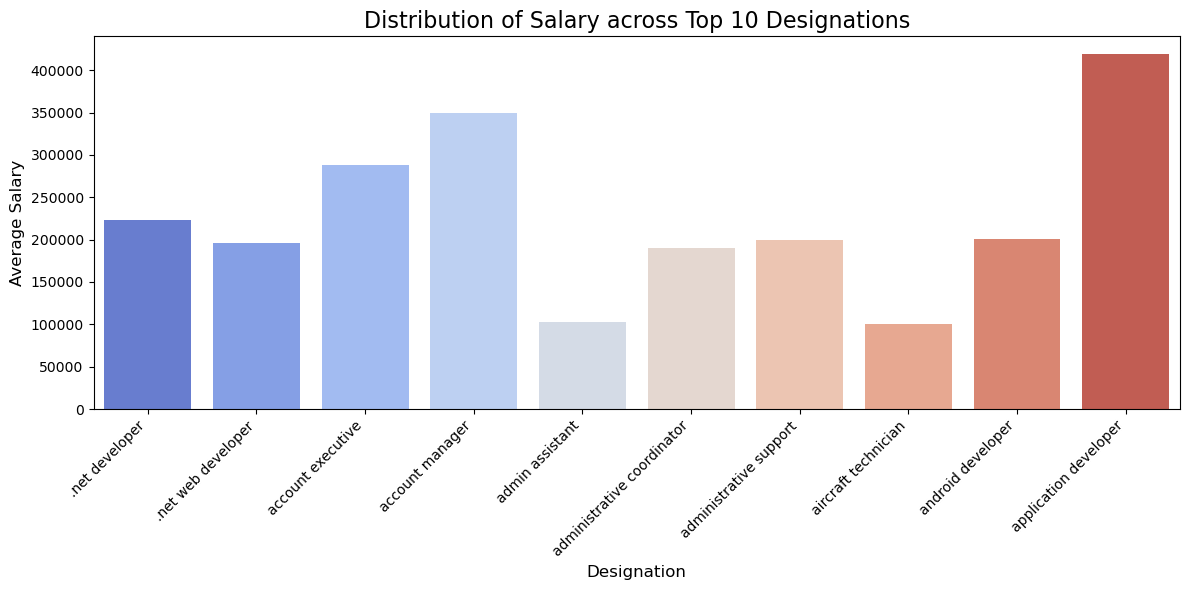

In [41]:
plt.figure(figsize=(12, 6))  # Set a larger figure size for better visibility
sns.barplot(x=g3.index[:10], y=g3["Salary"][:10], palette='coolwarm')  # Use a color palette for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability and alignment
plt.title("Distribution of Salary across Top 10 Designations", fontsize=16)  # Enhanced title
plt.xlabel("Designation", fontsize=12)  # Add x-axis label
plt.ylabel("Average Salary", fontsize=12)  # Add y-axis label
plt.tight_layout()  # Adjust layout for better spacing
plt.show()



**OBSERVATION**
 The bar plot highlights the top designations based on average salary, allowing for easy identification of which roles command the highest pay.

In [30]:
g4 = df.pivot_table(columns="CollegeTier", index="Specialization", values="Salary", aggfunc="mean")
g4.head()



CollegeTier,1,2
Specialization,,
aeronautical engineering,NaN,148333.333333
applied electronics and instrumentation,NaN,348333.333333
automobile/automotive engineering,NaN,222000.000000
biomedical engineering,435000.0,145000.000000
biotechnology,382500.0,234615.384615


C:\Users\user\AppData\Local\Temp\ipykernel_11428\4060744231.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g4.index[:10], y=g4[1][:10], palette='viridis')  # Use a color palette for better visualization


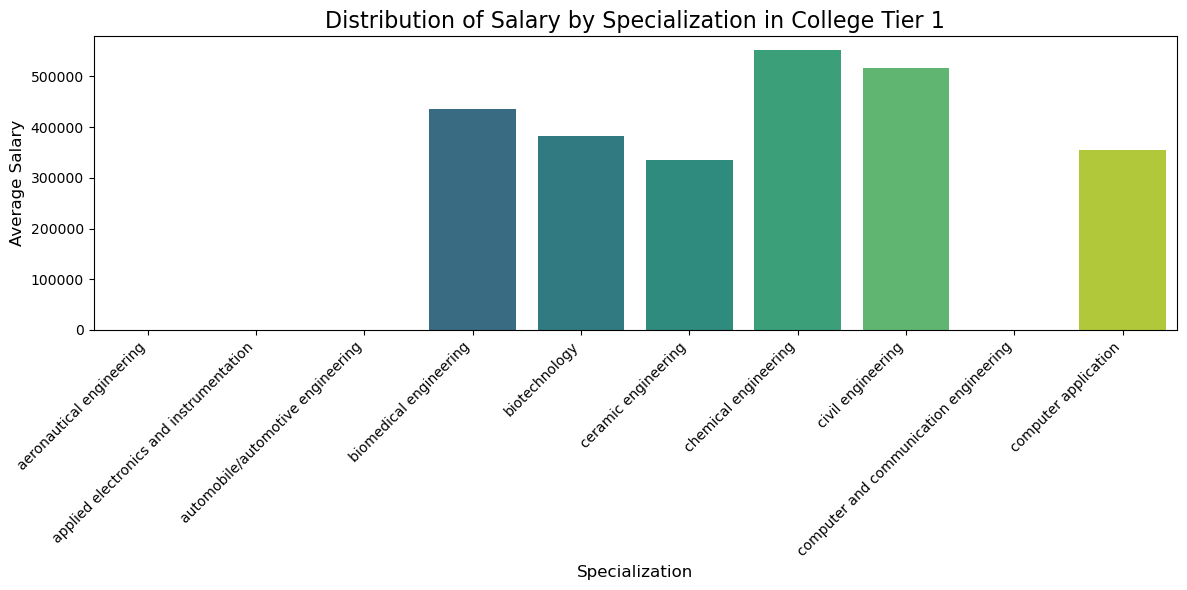

In [42]:
# Create a bar plot for the top 10 specializations in CollegeTier 1
plt.figure(figsize=(12, 6))  # Set a larger figure size for better visibility
sns.barplot(x=g4.index[:10], y=g4[1][:10], palette='viridis')  # Use a color palette for better visualization
plt.xlabel("Specialization", fontsize=12)  # Add x-axis label
plt.ylabel("Average Salary", fontsize=12)  # Add y-axis label
plt.title("Distribution of Salary by Specialization in College Tier 1", fontsize=16)  # Enhanced title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


**OBSERVATIONS**
The bar plot identifies the specializations within College Tier 1 that have the highest average salaries, providing valuable insights into lucrative fields of study.

C:\Users\user\AppData\Local\Temp\ipykernel_11428\104056843.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=g4.index[:10], y=g4[1][:10], palette='plasma')  # Use a different color palette


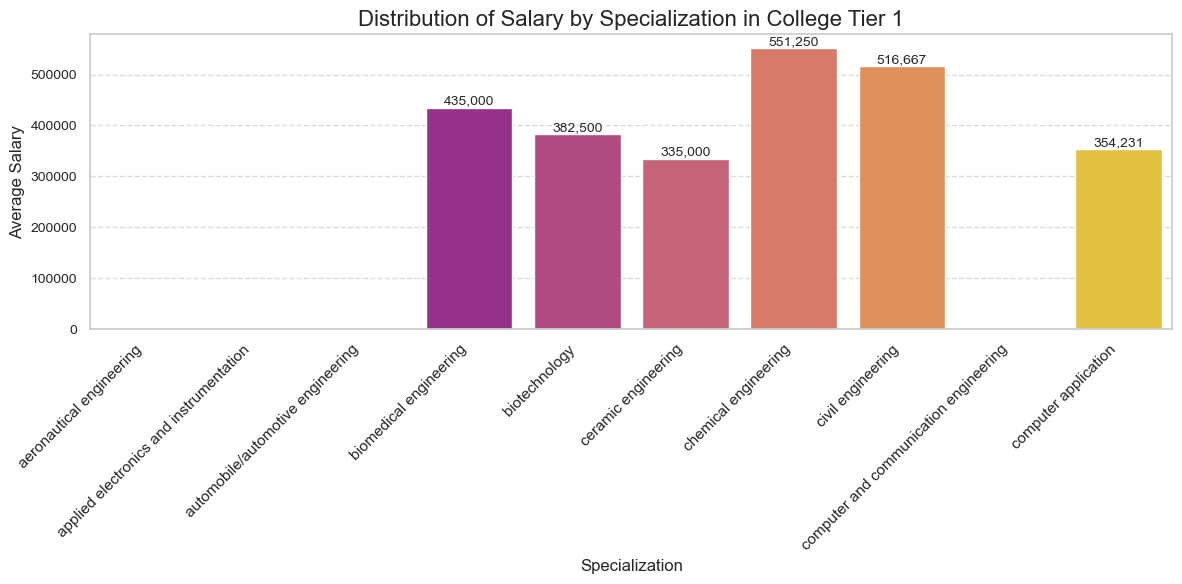

In [43]:
# Set the style for better aesthetics
sns.set(style='whitegrid')

# Create a bar plot for the top 10 specializations in CollegeTier 1
plt.figure(figsize=(12, 6))  # Set a larger figure size for better visibility
bar_plot = sns.barplot(x=g4.index[:10], y=g4[1][:10], palette='plasma')  # Use a different color palette

# Adding data labels on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=10)

plt.xlabel("Specialization", fontsize=12)  # Add x-axis label
plt.ylabel("Average Salary", fontsize=12)  # Add y-axis label
plt.title("Distribution of Salary by Specialization in College Tier 1", fontsize=16)  # Enhanced title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)  # Increase y-axis font size for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines to y-axis

plt.tight_layout()  # Adjust layout for better spacing
plt.show()



**OBSERVATIONS**
The bar plot reveals which specializations in College Tier 2 have the highest average salaries, helping to identify financially rewarding fields of study.



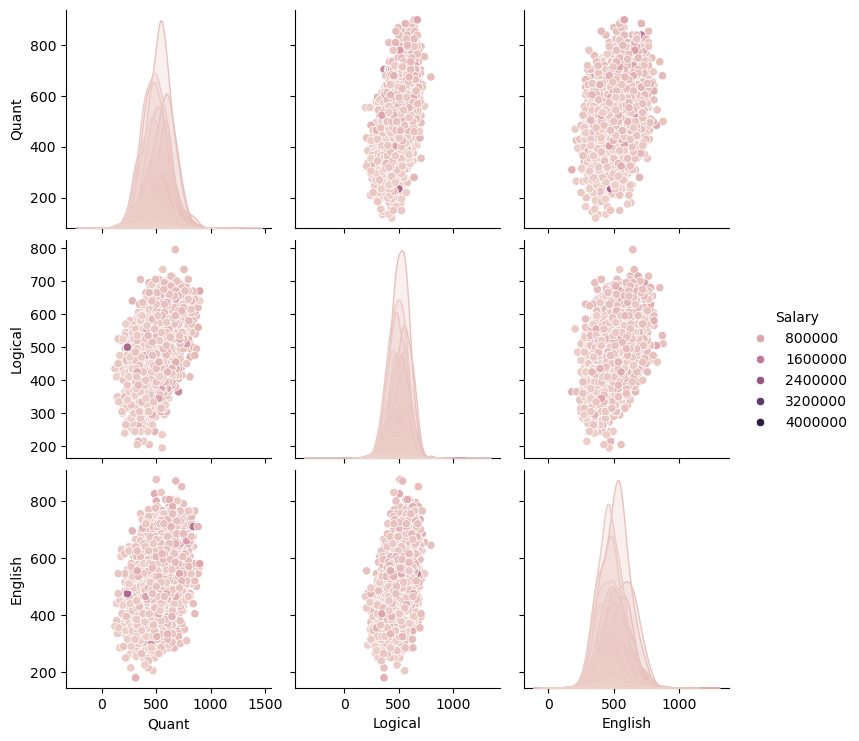

In [33]:
sns.pairplot(df, vars=['Quant', 'Logical', 'English'], hue='Salary')
plt.show()

**OBSERVATIONS**
The pair plot visually illustrates the relationships between the quantitative variables (Quant, Logical, and English), allowing you to assess how they correlate with each other and with the Salary variable
i can write it as observations

In [34]:
df[['ComputerScience', 'ElectronicsAndSemicon', 'MechanicalEngg', 'Salary']].corr()

,ComputerScience,ElectronicsAndSemicon,MechanicalEngg,Salary
ComputerScience,1.000000,-0.273707,-0.124355,-0.100720
ElectronicsAndSemicon,-0.273707,1.000000,-0.109434,0.000665
MechanicalEngg,-0.124355,-0.109434,1.000000,0.018475
Salary,-0.100720,0.000665,0.018475,1.000000


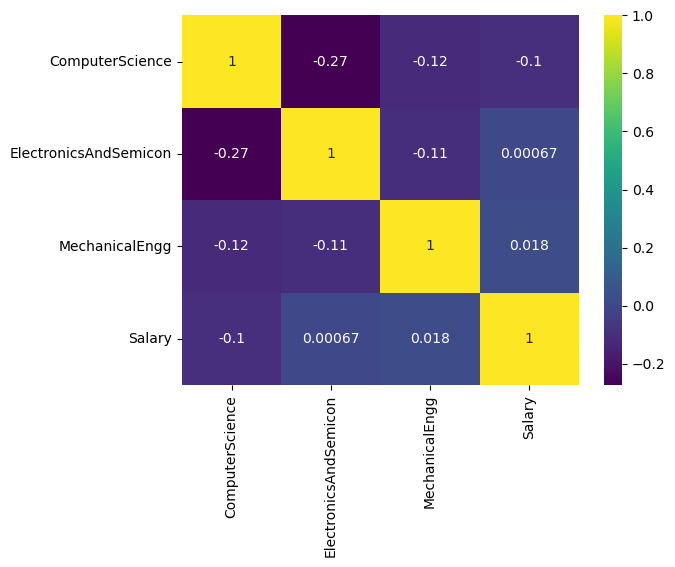

In [35]:
sns.heatmap(df[['ComputerScience', 'ElectronicsAndSemicon', 'MechanicalEngg', 'Salary']].corr(), annot=True, cmap="viridis")
plt.show()


**OBSERVATIONS**
 The heatmap provides a visual representation of the correlation coefficients between the different fields of study (Computer Science, Electronics and Semiconductor, Mechanical Engineering) and Salary, helping to identify which areas have strong or weak relationships with salary.



In [36]:
grouped_df = df.groupby(['Gender', 'Specialization'])[['collegeGPA', 'Salary']].mean()
grouped_df

collegeGPA         Salary
Gender Specialization                                                    
f      aeronautical engineering                  77.000000  180000.000000
       applied electronics and instrumentation   78.750000  287500.000000
       biomedical engineering                    64.650000  290000.000000
       biotechnology                             72.941111  247222.222222
       chemical engineering                      55.600000  100000.000000
...                                                    ...            ...
m      metallurgical engineering                 75.550000  337500.000000
       other                                     75.619231  266538.461538
       polymer technology                        72.790000  700000.000000
       power systems and automation              76.000000  100000.000000
       telecommunication engineering             77.476000  351000.000000

[71 rows x 2 columns]

C:\Users\user\AppData\Local\Temp\ipykernel_11428\2805736630.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotate x-axis labels for readability
C:\Users\user\AppData\Local\Temp\ipykernel_11428\2805736630.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  # Rotate x-axis labels for readability


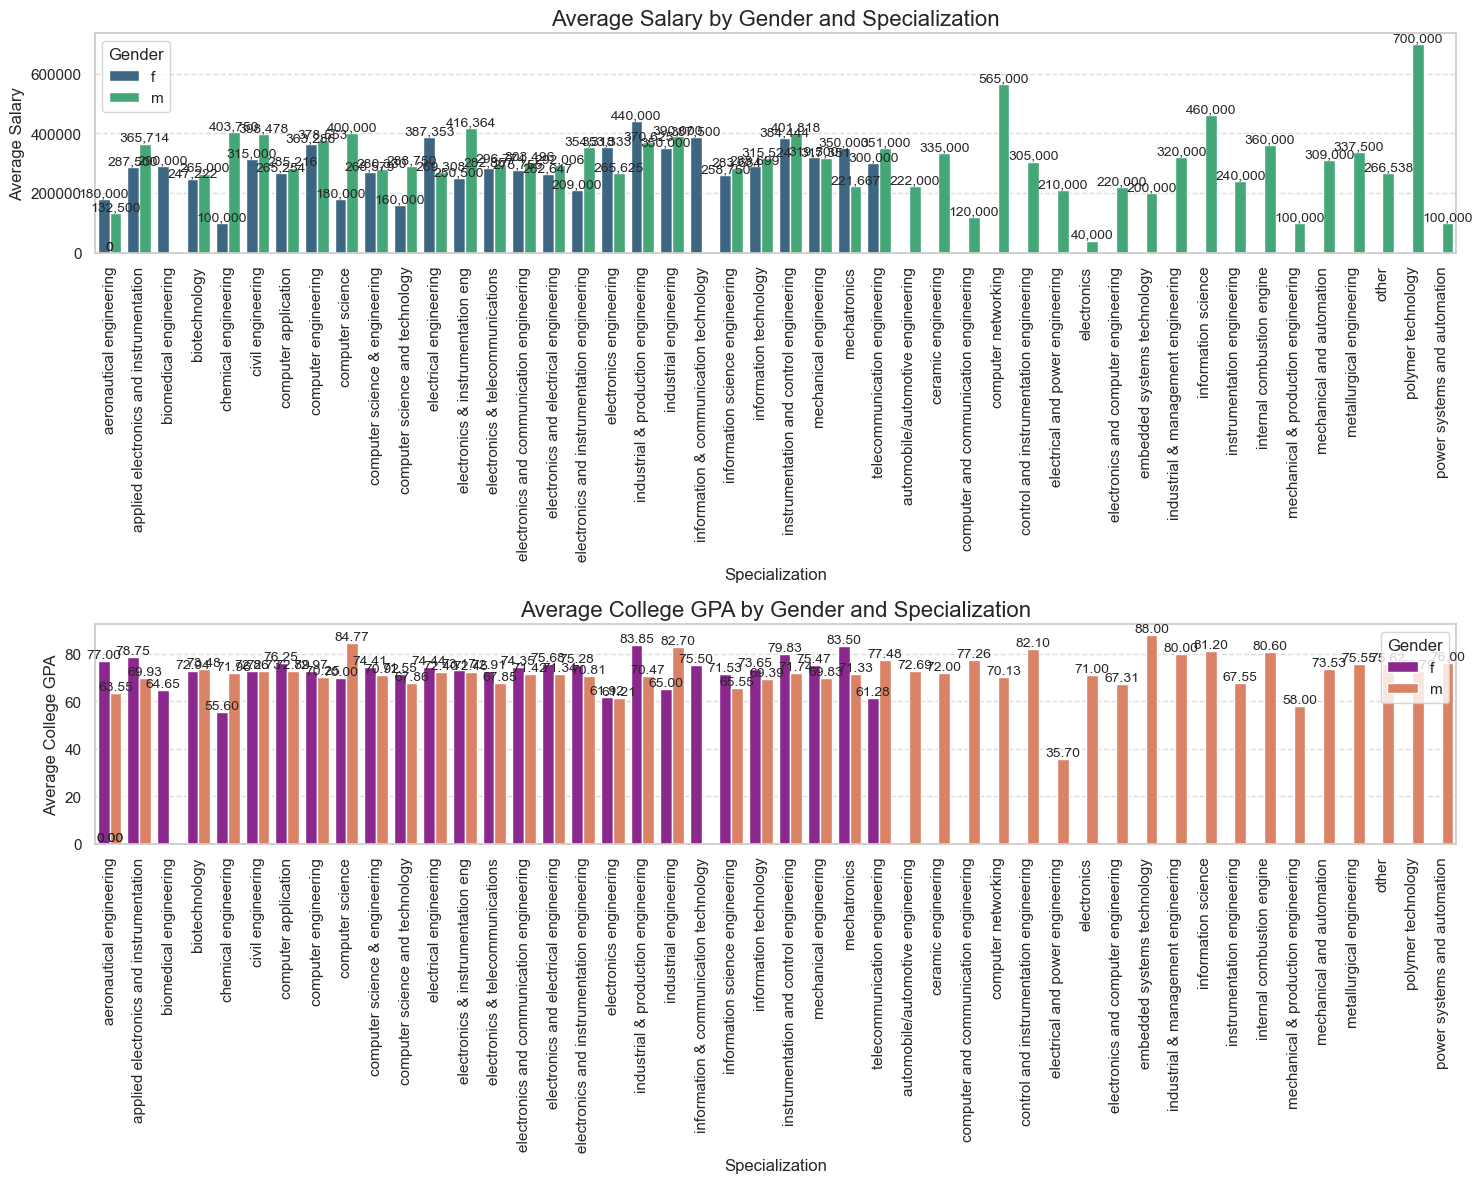

In [44]:
# Set the style for better aesthetics
sns.set(style='whitegrid')

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))  # Two rows, one column

# First subplot: Average Salary by Gender and Specialization
sns.barplot(x='Specialization', y='Salary', hue='Gender', data=grouped_df, ax=axes[0], palette='viridis')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)  # Rotate x-axis labels for readability
axes[0].set_title('Average Salary by Gender and Specialization', fontsize=16)
axes[0].set_ylabel('Average Salary', fontsize=12)

# Adding data labels to the first plot
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height():,.0f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Second subplot: Average College GPA by Gender and Specialization
sns.barplot(x='Specialization', y='collegeGPA', hue='Gender', data=grouped_df, ax=axes[1], palette='plasma')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)  # Rotate x-axis labels for readability
axes[1].set_title('Average College GPA by Gender and Specialization', fontsize=16)
axes[1].set_ylabel('Average College GPA', fontsize=12)

# Adding data labels to the second plot
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height():.2f}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', fontsize=10)

# Adding grid lines to both plots
for ax in axes:
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)  # Add grid lines to y-axis

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


**OBSERVATIONS**
Observing the plot can reveal significant disparities in salary based on gender within specific specializations. If one gender consistently earns more across multiple fields, it highlights potential inequality in pay that may warrant further investigation.

In [38]:
from scipy import stats

relevant_roles = ['Programmer Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
filtered_df = df[df['Designation'].isin(relevant_roles)]
salary_data = filtered_df['Salary']
claimed_mean_salary = 2.75 * 100000  # Convert Lakhs to the actual units (e.g., 2.75 lakhs = 275000)

# Perform t-test
t_stat, p_value = stats.ttest_1samp(salary_data, claimed_mean_salary)

# Print results
print(f"Mean Salary of Selected Roles: {salary_data.mean():.2f}")
print(f"Claimed Mean Salary: {claimed_mean_salary:.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average salary is significantly different from the claimed mean.")
else:
    print("Fail to reject the null hypothesis: The average salary is not significantly different from the claimed mean.")


Mean Salary of Selected Roles: nan
Claimed Mean Salary: 275000.00
T-statistic: nan
P-value: nan
Fail to reject the null hypothesis: The average salary is not significantly different from the claimed mean.


E:\Newfolder\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
E:\Newfolder\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [39]:
from scipy import stats as st
import pandas as pd

cont_table = pd.crosstab(index=df["Specialization"], columns=df["Gender"])
Chi2_stat, p_value, dof, exp_freq = st.chi2_contingency(cont_table)

alpha = 0.05  # Set significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between gender and specialization.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between gender and specialization.")


Reject the null hypothesis: There is a significant difference between gender and specialization.


**Conclusion**


This project aimed to explore the relationships between various factors such as gender, specialization, salary, and academic performance (college GPA) within a dataset of individuals pursuing different engineering roles. Through a series of analyses, we aimed to uncover significant trends and insights that could inform future hiring practices and educational focus.

